<a href="https://colab.research.google.com/github/DionKimmm/2019SummerML/blob/master/Day25_02_Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denoising Auto Encoder
![대체 텍스트](http://drive.google.com/uc?export=view&id=1iHaK76Isxv1a4kI3fqUNhxdE2nkOToQl)

In [0]:
import warnings
warnings.filterwarnings(action='ignore') 

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels

In [0]:

#Plot function
def plotresult(org_vec,noisy_vec,out_vec):
    plt.matshow(np.reshape(org_vec, (28, 28)), cmap=plt.get_cmap('gray'))
    plt.title("Original Image")
    plt.colorbar()

    plt.matshow(np.reshape(noisy_vec, (28, 28)), cmap=plt.get_cmap('gray'))
    plt.title("Input Image")
    plt.colorbar()
    
    outimg = np.reshape(out_vec, (28, 28))
    plt.matshow(outimg, cmap=plt.get_cmap('gray'))
    plt.title("Reconstructed Image")
    plt.colorbar()
    plt.show()

In [0]:
# NETOWRK PARAMETERS
n_input = 784
n_hidden_1 = 256 
n_hidden_2 = 256 
n_output = 784

epochs = 100
batch_size = 100
disp_step = 10

In [0]:
# PLACEHOLDERS
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_output])
dropout_keep_prob = tf.placeholder("float")

In [0]:
# WEIGHTS
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}


In [0]:
encode_in = tf.nn.sigmoid\
          (tf.add(tf.matmul\
                  (x, weights['h1']),\
                  biases['b1'])) 

encode_out = tf.nn.dropout\
             (encode_in, dropout_keep_prob) 


In [0]:
decode_in = tf.nn.sigmoid\
          (tf.add(tf.matmul\
                  (encode_out, weights['h2']),\
                  biases['b2'])) 

decode_out = tf.nn.dropout(decode_in,\
                           dropout_keep_prob) 

In [0]:
y_pred = tf.nn.sigmoid\
         (tf.matmul(decode_out,\
                    weights['out']) +\
          biases['out'])

In [0]:

# COST
cost = tf.reduce_mean(tf.pow(y_pred - y, 2))

# OPTIMIZER
optmizer = tf.train.AdamOptimizer(0.01).minimize(cost)

Start Training
Epoch 00/100 average cost: 0.093076
Start Test
Test label is 0


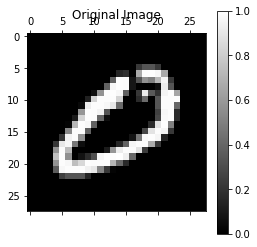

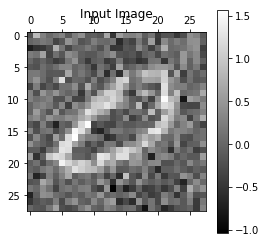

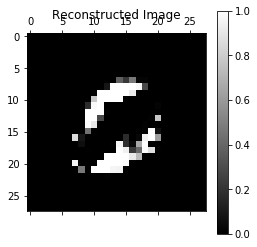

Epoch 10/100 average cost: 0.024273
Start Test
Test label is 8


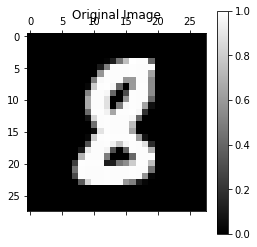

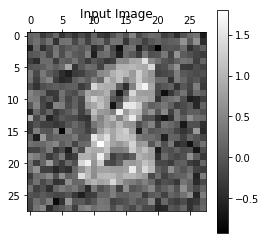

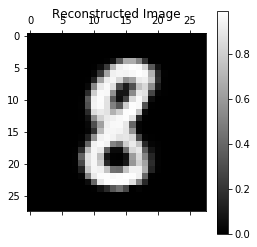

Epoch 20/100 average cost: 0.021515
Start Test
Test label is 1


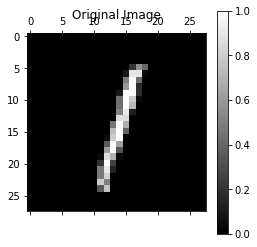

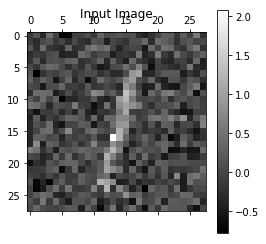

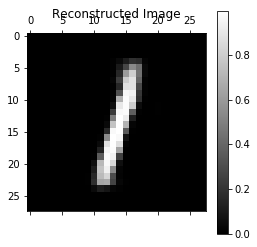

Epoch 30/100 average cost: 0.020323
Start Test
Test label is 2


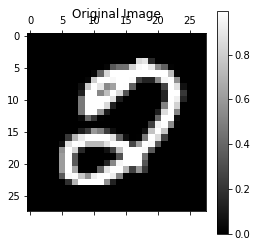

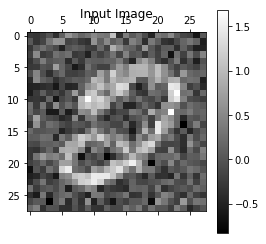

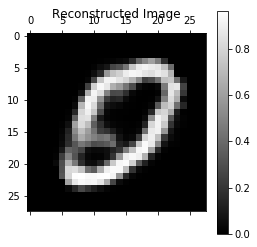

Epoch 40/100 average cost: 0.019520
Start Test
Test label is 1


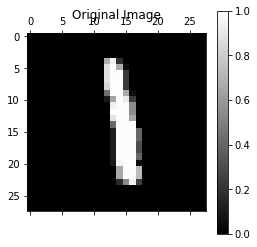

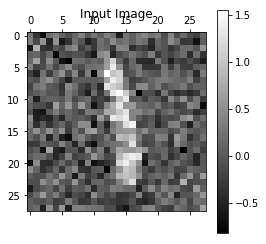

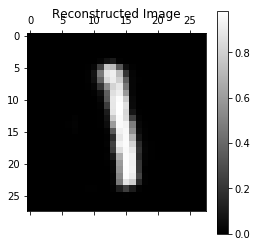

Epoch 50/100 average cost: 0.018876
Start Test
Test label is 6


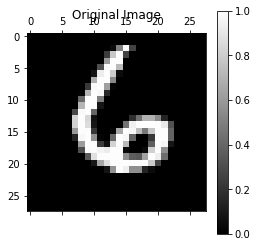

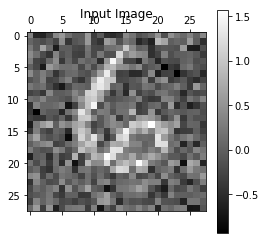

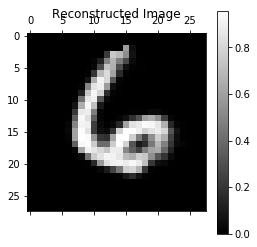

Epoch 60/100 average cost: 0.018334
Start Test
Test label is 5


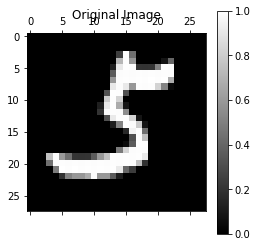

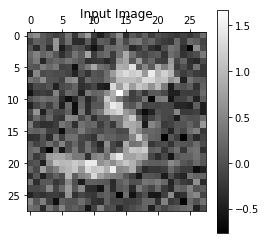

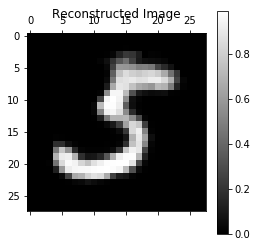

Epoch 70/100 average cost: 0.017880
Start Test
Test label is 1


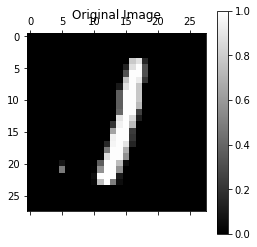

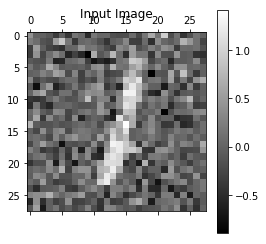

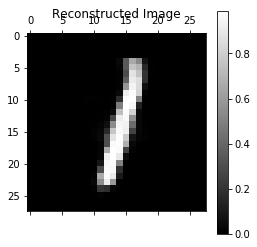

Epoch 80/100 average cost: 0.017544
Start Test
Test label is 8


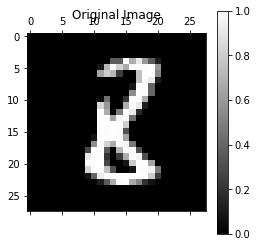

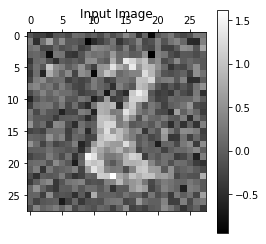

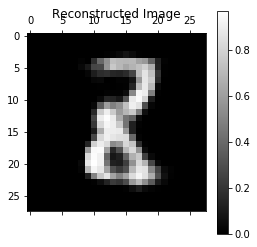

Epoch 90/100 average cost: 0.017274
Start Test
Test label is 7


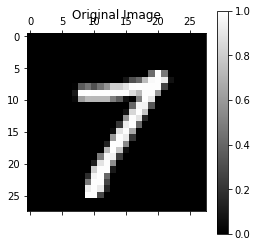

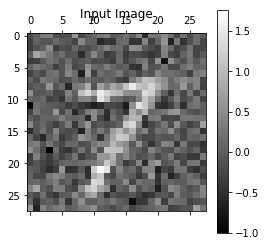

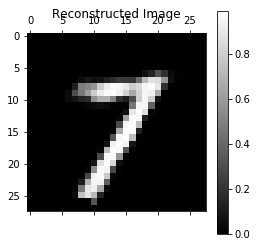

In [0]:
# Launch the graph
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print("Start Training")
for epoch in range(epochs):
    num_batch  = int(mnist.train.num_examples/batch_size)
    total_cost = 0.
    for i in range(num_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs_noisy = batch_xs + 0.3*np.random.randn(batch_size, 784)
        feeds = {x: batch_xs_noisy, y: batch_xs, dropout_keep_prob: 0.8}
        sess.run(optmizer, feed_dict=feeds)
        total_cost += sess.run(cost, feed_dict=feeds)
    # DISPLAY
    if epoch % disp_step == 0:
        print("Epoch %02d/%02d average cost: %.6f"
               % (epoch, epochs, total_cost/num_batch))

        # Test one
        print("Start Test")
        randidx   = np.random.randint\
                    (testimg.shape[0], size=1)
        orgvec    = testimg[randidx, :]
        testvec   = testimg[randidx, :]
        label     = np.argmax(testlabel[randidx, :], 1)

        print("Test label is %d" % (label))
        noisyvec = testvec + 0.3*np.random.randn(1, 784)
        outvec   = sess.run(y_pred,\
                            feed_dict={x: noisyvec,\
                                       dropout_keep_prob: 1})

        plotresult(orgvec,noisyvec,outvec)
